Function and Data import

In [53]:
"""
This program aims to build a decision tree classifier using sklearn
using the cancer data and then analyze the performance of the tree
using different hyperparameters

References: https://medium.com/codex/building-and-visualizing-decision-tree-in-python-2cfaafd8e1bb
"""

# import necessary packages
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size

from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

# malignant will be positive, benign will be negative
def confusion_matrix(predict, actual):
  total = len(predict)
  t = 0
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for i in range(len(predict)):
    if predict[i] == actual[i]:
      t += 1
    if predict[i] == 'M' and actual[i] == 'M':
      tp += 1
    if predict[i] == 'B' and actual[i] == 'M':
      fn += 1
    if predict[i] == 'M' and actual[i] == 'B':
      fp += 1
    if predict[i] == 'B' and actual[i] == 'B':
      tn += 1
  
  print("Now printing out info of confusion matrix")
  print("Accuracy of the tree is {:.4%}".format(t/total))
  print("Precision of the tree is {:.4%}".format(tp/(tp+fp)))
  print("Recall/sensitivity of the tree is {:.4%}".format(tp/(tp+fn)))
  print("tp {} tp + fn{}".format(tp, tp+fn))
  print("Specificity of the tree is {:.4%}".format(tn/(tn+fp)))
  


rcParams['figure.figsize'] = (25, 20)

# I will use pandas to import the dataset as a data frame
file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Classification/DecTreeAssign1.dat'
#file_name = 'fetal_health.csv'
df = pd.read_csv(file_name)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   569 non-null    object 
 1   F00     569 non-null    float64
 2   F01     569 non-null    float64
 3   F02     569 non-null    float64
 4   F03     569 non-null    float64
 5   F04     569 non-null    float64
 6   F05     569 non-null    float64
 7   F06     569 non-null    float64
 8   F07     569 non-null    float64
 9   F08     569 non-null    float64
 10  F09     569 non-null    float64
 11  F10     569 non-null    float64
 12  F11     569 non-null    float64
 13  F12     569 non-null    float64
 14  F13     569 non-null    float64
 15  F14     569 non-null    float64
 16  F15     569 non-null    float64
 17  F16     569 non-null    float64
 18  F17     569 non-null    float64
 19  F18     569 non-null    float64
 20  F19     569 non-null    float64
 21  F20     569 non-null    float64
 22  F2

Data splitting for cancer data

In [68]:
df = df.drop([122,152,212,461])

In [69]:
# split the data into X and Y
train, test = train_test_split(df, test_size = 0.1)  # test size can also be manipulated
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
Y_test = test.iloc[:,0]
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
print("X_train has shape of {}".format(X_train.shape))  #(455,30)
print("Y_train has shape of {}".format(Y_train.shape))  #(455,)
print("X_test has shape of {}".format(X_test.shape))   #(114,30)
print("Y_test has shape of {}".format(Y_test.shape))  #(114,)

X_train has shape of (508, 30)
Y_train has shape of (508,)
X_test has shape of (57, 30)
Y_test has shape of (57,)


Data splitting for fetal health data

In [27]:
# split the data into X and Y
train, test = train_test_split(df, test_size = 0.2)  # test size can also be manipulated
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
print("X_train has shape of {}".format(X_train.shape))  
print("Y_train has shape of {}".format(Y_train.shape)) 
print("X_test has shape of {}".format(X_test.shape))   
print("Y_test has shape of {}".format(Y_test.shape)) 

X_train has shape of (455, 30)
Y_train has shape of (455,)
X_test has shape of (114, 30)
Y_test has shape of (114,)


In [70]:
# use scikit-learn package to build a DecisionTreeClassifier

# hyperparameters
criterion = "entropy" # can also be entropy
max_depth = 30   # can be any number, play with it
min_split = 5   # minimum number of samples required to split an internal node, default 2
min_impurity_decrease = 0.001 # threshold for early stopping in tree growth


tree_model = dtc(
    criterion = criterion,
    max_depth = max_depth,
    min_samples_split = min_split,
    min_impurity_decrease = min_impurity_decrease
    )

tree_model.fit(X_train, Y_train)
predict_tree = tree_model.predict(X_test)

print("Some hyperparameters that I used")
print("The criterion to split the tree is {}".format(criterion))
print("The max_depth of the tree is {}".format(max_depth))
print("The min_samples_split is {}".format(min_split))
print("The min_impurity_decrease is {}".format(min_impurity_decrease))
print('Accuracy of the model is {:.5%}'.format(accuracy_score(Y_test, predict_tree)))
print()
if file_name == '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Classification/DecTreeAssign1.dat':
  print(confusion_matrix(predict_tree, Y_test))

else:
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import classification_report
  confusion = confusion_matrix(predict_tree, Y_test)
  print(confusion)
  print(classification_report(Y_test, predict_tree, target_names=['Class 1', 'Class 2', 'Class 3']))

Some hyperparameters that I used
The criterion to split the tree is entropy
The max_depth of the tree is 30
The min_samples_split is 5
The min_impurity_decrease is 0.001
Accuracy of the model is 96.49123%

Now printing out info of confusion matrix
Accuracy of the tree is 96.4912%
Precision of the tree is 95.8333%
Recall/sensitivity of the tree is 95.8333%
tp 23 tp + fn24
Specificity of the tree is 96.9697%
None


Visualize the Tree for Cancer Data

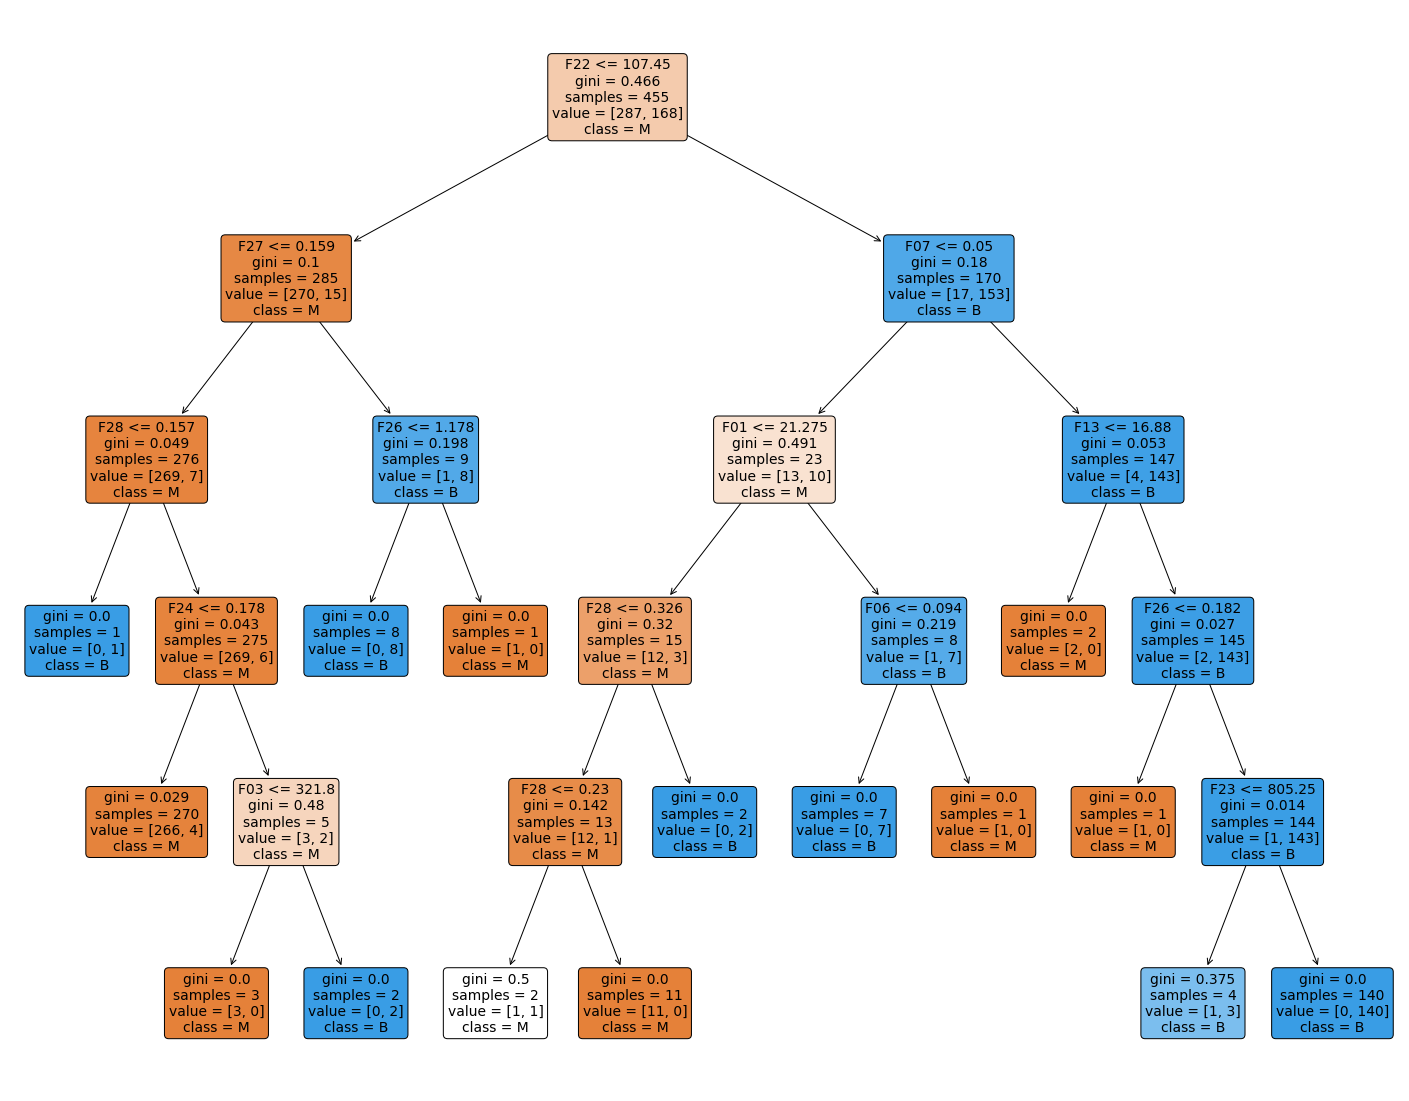

In [ ]:
# plot the tree

feature_names = df.columns[1:] #except the first column is the label
target_names = df['Class'].unique().tolist()


plot_tree(tree_model, feature_names= feature_names, class_names= target_names, filled= True, rounded=True)

plt.savefig('tree_visualization.png')



Visualize the Tree for Health Data

|--- feature_8 <= 0.55
|   |--- feature_7 <= 59.50
|   |   |--- feature_12 <= 138.50
|   |   |   |--- feature_2 <= 0.02
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_2 >  0.02
|   |   |   |   |--- class: 2.0
|   |   |--- feature_12 >  138.50
|   |   |   |--- feature_19 <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_19 >  0.50
|   |   |   |   |--- class: 2.0
|   |--- feature_7 >  59.50
|   |   |--- feature_9 <= 68.50
|   |   |   |--- feature_7 <= 79.50
|   |   |   |   |--- feature_9 <= 6.50
|   |   |   |   |   |--- feature_0 <= 143.50
|   |   |   |   |   |   |--- feature_3 <= 0.00
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- feature_3 >  0.00
|   |   |   |   |   |   |   |--- feature_10 <= 9.40
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- feature_10 >  9.40
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_0 >  143.50
|   |   |   |   |   |   |--- class: 2.0
|   |   

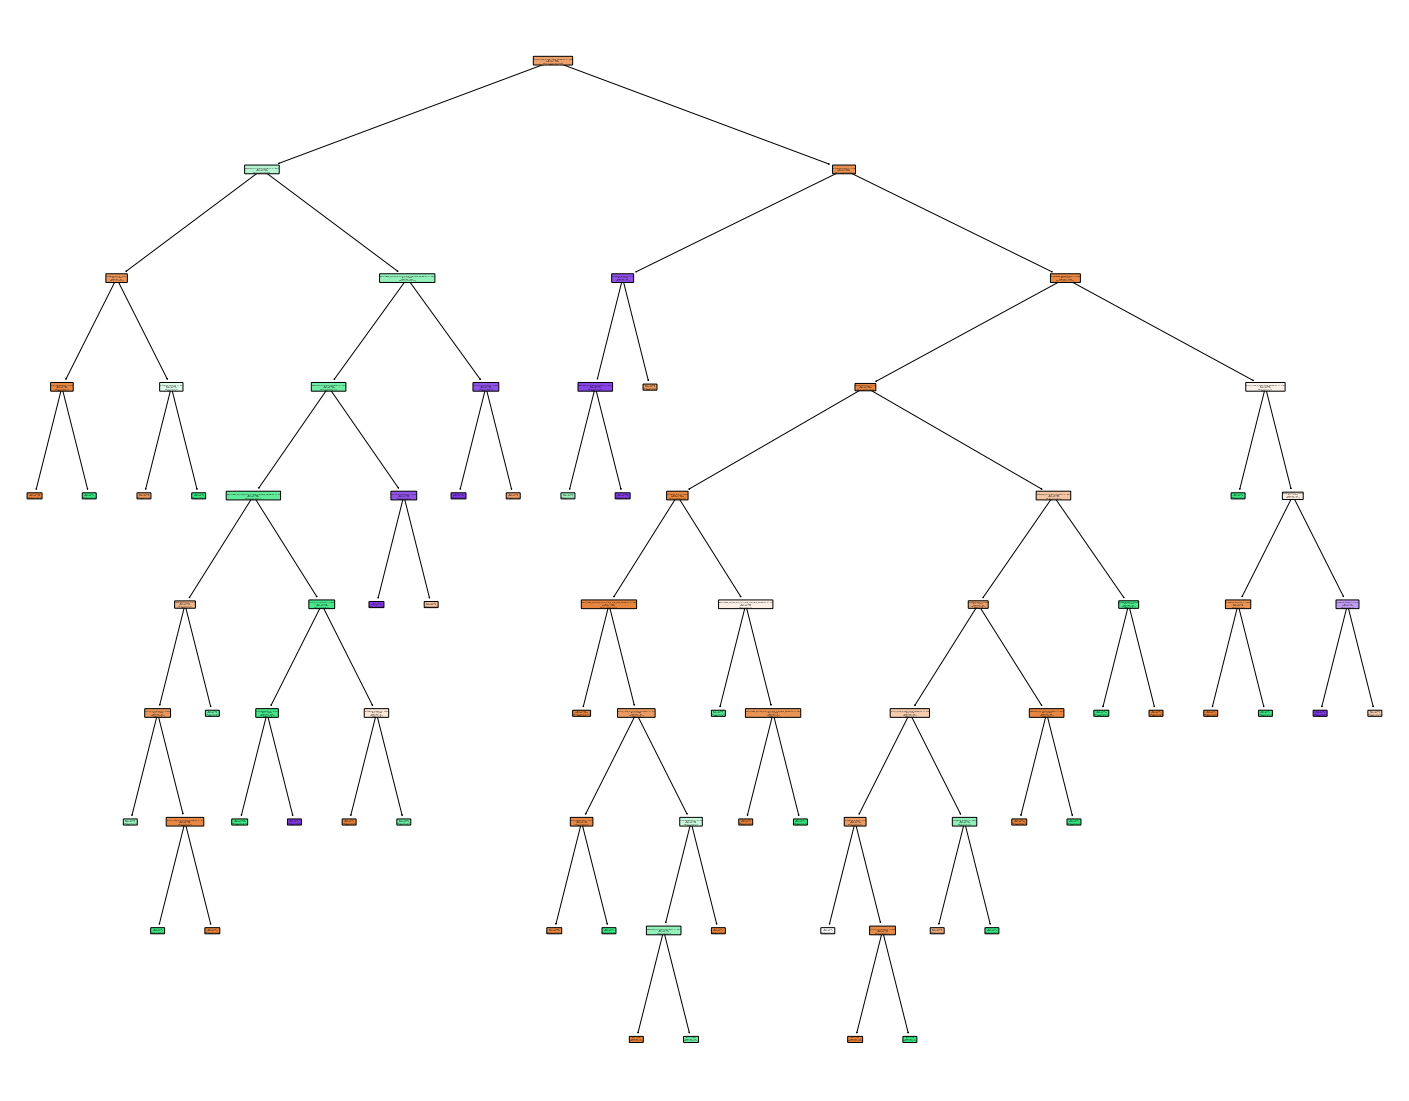

In [ ]:
feature_names = df.columns[:-1] #except the last column is the label
target_names = df['fetal_health'].unique().tolist()
target_names = [str(target_names[i]) for i in range(len(target_names))]
plot_tree(tree_model, feature_names= feature_names, class_names= target_names, filled= True, rounded=True)

plt.savefig('tree_visualization_health.png')

from sklearn.tree import export_text

r = export_text(tree_model)
print(r)